In [1]:
import numpy as np
from sampler import *
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.stats as stats
from math import prod

np.random.seed(1)

def uniform(x):
    if x < 0:
        return 0
    if x > 1:
        return 0
    else:
        return 1

def normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

x0 = 10
sigma = 1

def erf(x):
    if x > 0:
        return (np.exp(-(x-x0)**2/(2*sigma**2) - np.exp(-(x+x0)**2/(2*sigma**2))))/(sigma*np.sqrt(np.pi*2))/sp.erf(x0/sigma/np.sqrt(2))
    else:
        return 0

uniform_sampler = Sampler(uniform, domain=(True, 0, 1))
normal_sampler = Sampler(normal, domain=(True, -5, 5))
erf_sampler = Sampler(erf, domain=(True, 5, 15))

# Exercise 6

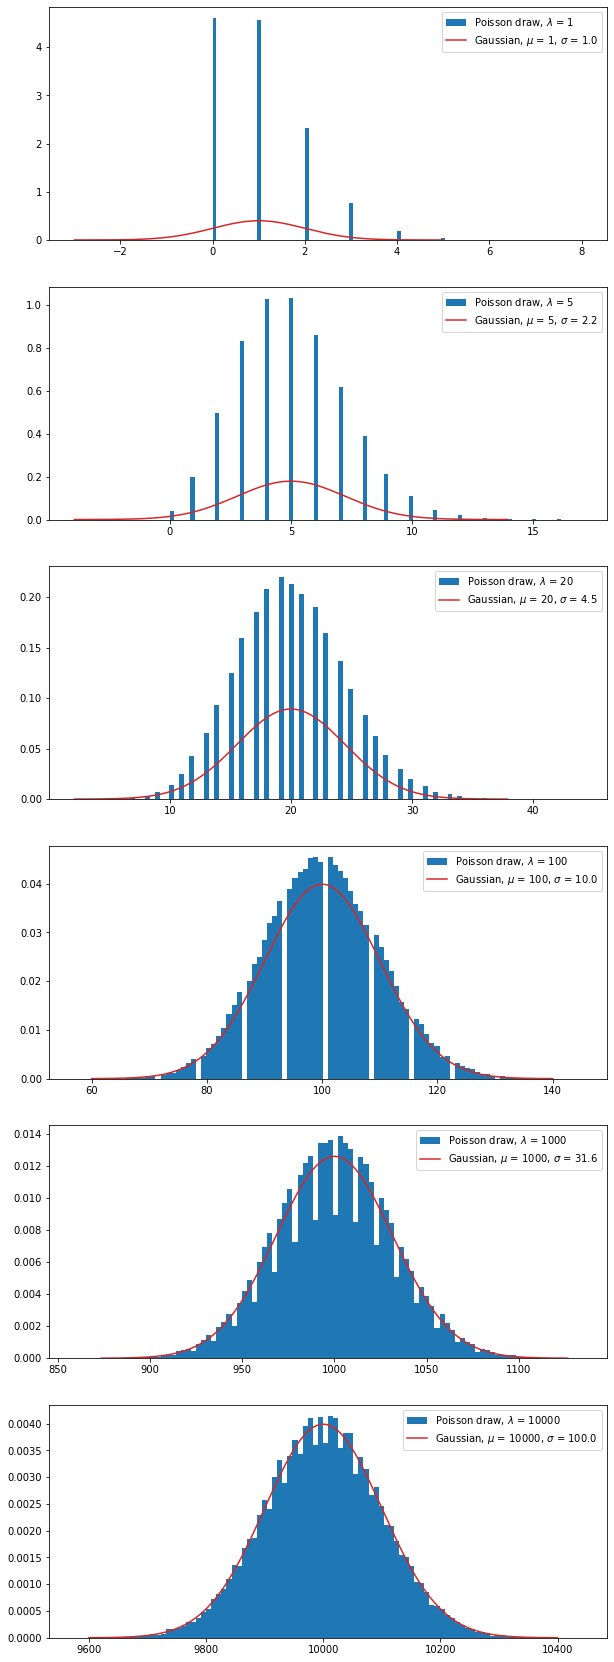

In [2]:
fig, ax = plt.subplots(6, 1, figsize=(10,30), facecolor="white")
lam = [1, 5, 20, 100, 1000, 10000]

for i in range(len(lam)):
    l = lam[i]
    x = np.linspace(l - l**0.5*4, l + l**0.5*4, 10000)
    poisson_draws = np.random.poisson(l, 100000)
    gaussian = [np.exp(-(xi-l)**2/2/l)/np.sqrt(2*np.pi)/l**0.5 for xi in x]
    ax[i].hist(poisson_draws, density=True, bins=100, label=f'Poisson draw, $\lambda$ = {l}')
    ax[i].plot(x, gaussian, label=f'Gaussian, $\mu$ = {l}, $\sigma$ = {l**0.5:.1f}', color='tab:red')
    ax[i].legend()

    